<img src="res/viu_logo.png" width="200"><img src="res/datathonlogo.png" width="250"> <meta charset="utf-8">
    <small>©2023 VIU - Master Universitario en Big data y Data Science</small>
                                                     
<img src="res/banner.png" width="2000">
 
# Cómo afrontar un proyecto de competición de ciencia de datos: el caso del Datathon Cajamar 2022

<br>
 Arturo Martínez Perona, Data Analyst en VIU - Universidad Internacional de Valencia
<br>
 José Ramón Casero Fuentes, Data Scientist en Accenture
<br>
<img src="res/winners.jpeg" width="450">

# Inicializando el proyecto

A la hora de inicializar un proyecto de datos, existen múltiples pasos a tener en cuenta. Esto puede encararse en dos planos diferentes, uno de ellos podría ser considerado como el físico, es decir, todo aquel que se dedique al mantenimiento y desarrollo del código, y el otro podría llamarse como __no físico__, o aquel más orientado a la estrategia. Este último pertenecería más especialmente a lo que conocemos como metodologías de proyectos.

Por lo que respecta a ese plano __físico__, y especialmente si este proyecto incluye varias personas es buena idea, utilizar un sistema de control de versiones, como Git.
Un sistema de control de versiones (VCS) es un conjunto de herramientas que rastrean la historia de una serie de ficheros. Esto significa que el sistema es capaz de guardar el estado de los ficheros en un momento determinado, para después continuar con su edición y almacenar también ese estado. Almacenar el estado es similar a crear una copia de seguridad del directorio de trabajo. Cuando se usa Git, esto almacenamiento del estado se conoce como hacer un commit.

Cuando se hace un commit en Git, se añade un mensaje para ese commit que explique los cambios. Git puede mostrar la historia de todos los commits y sus mensajes asociados. Esto permite poder navegar con facilidad sobre los cambios realizados, así como informar a los compañeros acerca del historial, permitiendo encontrar más fácilmente errores, o solucionarlos volviendo a un estado anterior.


Para crear las bases del proyecto se puede construir una típica estructura de proyecto de python para git

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ bash
└── datathon
    ├── docs
    ├── README.md
    ├── .gitignore
    ├── data
    ├── models
    ├── res
    ├── results
    └── scripts
        ├── eda.ipynb
        ├── train.py
        └── test.py
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

El fichero *`eda.ipynb`* es un notebook de python donde se realiza un análisis exploratorio de datos, permitiendo ejecutar código y visualizar fácilmente, al ser una fase más de compresión y exploración, los notebooks son realmente útiles.

Los ficheros *`train.py`* y *`test.py`* son un ejemplo posible para lanzarse ya a la ejecución del entrenamiento de un modelo basándose en la información adquirida durante la fase de exploración. 

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ python linenumbers


## Entornos virtuales

Otra buena opción a la hora de trabajar en un proyecto es la utilización de un entorno virtual. Cuando se trabaja en un proyecto, especialmente si es grande, y participan diferentes actores, esto puede llevar a problemas de integridad de versiones de librerías o incluso de la misma versión de python. Pongámos un ejemplo:

En vuestro grupo sois 3 personas, y vais a utilizar la librería statsmodels, sin embargo, uno de vosotros está utilizando esa librería para un proyecto personal, o para un trabajo de una asignatura, y en concreto está utilizando la versión 2.0.1, porque necesita una funcionalidad específica de esa versión, de modo que la tiene instalada en su sistema. Ahora bien, los demás han estado investigando y han encontrado un método para el análisis de una serie temporal que utiliza esa librería, pero que necesita la última versión, esto podría generar incompatibilidad con vuestro compañero.

El objetivo principal de un entorno virtual es crear un entorno aislado para los proyectos de Python. Cada proyecto puede tener sus propias librerias y dependencias, sin importar las dependencias que tengan otros proyectos. No hay límite de entornos que se pueden tener, puesto que son simplemente directorios con unos cuantos scripts, y se gestionan fácilmente usando *virtualenv*.

Para instalar *virtualenv* hay que hacerlo a través del instalador de paquetes de Python *pip*, desde la línea de comandos.

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ Bash
arturo@arturo-GS40-6QE-Phantom:/media/arturo/Baldr/seminario_big_data$ pip install virtualenv
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Se suele usar la convención de crear los entornos virtuales dentro de cada proyecto en el directorio raíz de los mismos, en una carpeta que se suele llamar `.venv`. De tal forma que dentro de cada proyecto ya van contenidos tanto la versión de Python requerida como los paquetes de los que se dependen.

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ Bash
arturo@arturo-GS40-6QE-Phantom:/media/arturo/Baldr/seminario_big_data$ mkdir Project
arturo@arturo-GS40-6QE-Phantom:/media/arturo/Baldr/seminario_big_data$ cd Project
arturo@arturo-GS40-6QE-Phantom:/media/arturo/Baldr/seminario_big_data$ virtualenv --python=/usr/bin/python3.10 .venv


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


<img src="res/virtualenv_ex.png" width="800"> 
<br>
<small>Localización del entorno virtual y su contenido </small>




# Metodología

Por lo que respecta al plano estratégico del proyecto, existen diferentes modelos metodológicos que se pueden implementar a vuestro proyecto. Un ejemplo es *[CRISP-DM](https://www.ibm.com/docs/it/spss-modeler/saas?topic=dm-crisp-help-overview)*, el cual nosotros utilizamos de una manera más o menos flexible.

<img src="res/metodologia_ex.png" width="800"><img src="res/cripsdm.png" width="450">
<br>
<small>Ejemplo esquemático del proyecto para Water Consumption de la competición en 2022 adaptado de CRISP-DM(IBM)</small>



La razón principal para utilizar una metodología es precisamente planificar diferentes fases e hitos para el proyecto, esto permite dividir las tareas de forma eficiente e ir completando una serie de pasos, que en general van desde una fase de minería de datos hasta la puesta en marcha del modelo.

## Entendiendo el problema

En el caso del esquema anterior, puede verse que el primer paso es una fase de entendimiento de negocio o de los datos. Si bien se puede sentir la tentación de ponernos manos a la obra y explorar rápidamente los datos, buscar outliers, valores negativos o no procedentes, y empezar a aplicar todo tipo de algoritmos y funciones sobre los mismo. Realmente la parte más importante es precisamente entender que es lo que tenemos delante, ya que en el momento en que vayamos explorar los datos, solo así entenderemos cual es la necesidad.

Para el caso del Datathon Water footprint 2022, el objetivo era realizar una predicción de demanda de consumo de agua.
La estimación correcta de la demanda de agua potable representa una condición indispensable para
la planificación, diseño y operación eficiente y sostenible de todos los elementos que conforman los
sistemas de captación, transporte y suministro de agua potable. Esta demanda está sujeta a
variaciones interanuales, estacionales, semanales, diarias e incluso horarias, muy significativas y que
dependen de múltiples factores como son los ciclos de actividad económica, la meteorología, las
situaciones de crisis sanitaria, los cambios en los bloques tarifarios, etc.

Por tanto se establece como objetivo el crear un modelo de predicción de consumo de agua para
realizar estimaciones a futuro, a partir de un conjunto de datos histórico.

En principio, **es esperable que entre una gran cantidad de contadores estos no se comporten todos
igual**. Esto es debido a que algunos pueden ser industriales, otros de hogares partículares, otros de
casas de veraneo, etc..

<img src="res/clusters.png" width="800">
<br>
<small>Diferentes posibles naturalezas de los contadores de agua</small>



## Explorando los datos

Una vez planificado el trabajo, es hora de observar cuales son los datos de entrada que se tienen:

**Variables**
 

*   ID: Identificador del Contador que registra la medida de lectura.
*   SAMPLETIME: Fecha y hora del consumo en formato UTC. Momento en el que se
produce el mensaje o el contador ha emitido el registro.
*   READINGINTEGER: Medida registrada por el contador en litros. Parte entera.
*   READINGTHOUSANDTH: Medida registrada por el contador en litros. Parte decimal.
*   DELTAINTEGER: Consumo calculado en litros a partir de la medida registrada por el contador. Parte entera.
*   DELTATHOUSANDTH: Consumo calculado en litros a partir de la medida registrada por el contador. Parte decimal.


Los ID están ordenados de forma ascendente pero no son correlativos

**Formato y estructura**
Este dataset tiene extensión txt con la siguiente estructura y formato:
• Nombres de variables: incluidos en la cabecera
• Separador: "|"
• Codificación: UTF-8
Sin nombre de fila.

### Visualización

Uno de los primeros pasos para encarar el proyecto es probar a visualizar los datos, con esto podemos rapidamente ser conscientes del comportamiento general de los datos, ver patrones, posible estacionalidad, etc...

A la hora de realizar este paso existen múltiples caminos a seguir:
* Weka
* Jupyter
* R
* Tableau
* Power BI


Power BI es una herramienta muy interesante a la hora de construir rápidamente visualizaciones y explorar los datos. Ya que os permite poder realizar análisis y cálculos de manera bastante sencilla y es amigable a la hora de filtrar datos, hacer agregaciones, segmentarlos, etc...

Además, los informes de Power BI pueden ser embebidos más adelante incluso en un notebook de jupyter, tal y como os introduzco a continuación:


In [1]:
from powerbiclient import Report
from io import StringIO
from ipywidgets import interact
import pandas as pd

In [2]:
from powerbiclient.authentication import DeviceCodeLoginAuthentication

device_auth = DeviceCodeLoginAuthentication()

Performing device flow authentication. Please follow the instructions below.
To sign in, use a web browser to open the page https://microsoft.com/devicelogin and enter the code DWX6F29N7 to authenticate.

Device flow authentication successfully completed.
You are now logged in.


In [3]:
report_id = '69200dca-dd49-4f79-b610-13bc461575ea'
group_id = '42292854-eaf4-4c0f-8f72-b1c035cea3f2'

#report_id = '27d78bdd-9641-49fd-a1d1-ee14b85e11e6'
#group_id = 'me'
report = Report(group_id=group_id, report_id=report_id, auth=device_auth)

Report is loaded
Report is rendered
Report is rendered
Report is rendered
Report is rendered
Report is rendered
Report is rendered
Report is rendered
Report is rendered
Report is rendered


In [4]:
def loaded_callback(event_details):
    print('Report is loaded')

report.on('loaded', loaded_callback)
def rendered_callback(event_details):
    print('Report is rendered')

report.on('rendered', rendered_callback)

In [5]:
report.set_size(800, 1100)
report

Report(container_height=800.0, container_width=1100.0)

In [6]:

def get_active_page(self):
    
    # Get list of pages
    pages = self.get_pages()
    active_page = {}
    for page in pages:
        
        # Get active page
        if page['isActive'] == True:
            active_page = page
            break
    return active_page

active_page = get_active_page(report)


In [7]:
active_page

{'name': 'ReportSectiona5223208608bee3aeec7',
 'displayName': 'Cuadro de Mandos',
 'isActive': True,
 'visibility': 0,
 'defaultSize': {'type': 0, 'width': 1280, 'height': 720},
 'mobileSize': None,
 'defaultDisplayOption': 0,
 'background': {'color': '#FFFFFF', 'transparency': 100, 'hasImage': False},
 'wallpaper': {'color': '#FFFFFF', 'transparency': 0, 'hasImage': False}}

In [11]:
active_page_name = active_page['name']
print(active_page_name)

# Get list of visuals on active page
visuals = report.visuals_on_page(active_page_name)
print(visuals)



ReportSectiona5223208608bee3aeec7
[{'name': '0111135e38213d12760d', 'title': 'Slicer', 'type': 'slicer', 'layout': {'x': 332.1652892561983, 'y': 639.6473829201102, 'z': 9000, 'width': 153.7410468319559, 'height': 66.99724517906336, 'displayState': {'mode': 0}}}, {'name': '8d52e05fa0a8705b4101', 'title': 'Slicer', 'type': 'slicer', 'layout': {'x': 485.90633608815426, 'y': 638.236914600551, 'z': 10000, 'width': 154.44628099173553, 'height': 66.99724517906336, 'displayState': {'mode': 0}}}, {'name': 'f9fb19008e403dea56b4', 'title': 'Slicer', 'type': 'slicer', 'layout': {'x': 640.3526170798898, 'y': 637.5316804407713, 'z': 11000, 'width': 100.84848484848484, 'height': 68.40771349862258, 'displayState': {'mode': 0}}}, {'name': 'be0ac57a8680cc4091ab', 'title': 'Card', 'type': 'card', 'layout': {'x': 320.1763085399449, 'y': 66.29201101928375, 'z': 1000, 'width': 265.8732782369146, 'height': 86.74380165289256, 'displayState': {'mode': 0}}}, {'name': '37d57cef2088b36ed07a', 'title': 'Slicer', '

In [16]:
# Get visual whose type is 'clusteredColumnChart'
visual = next(filter(lambda visual: visual['type'] == 'lineChart', visuals))
visual['name']

'f3e5fc418998a892503a'

In [19]:
summarized_exported_data = report.export_visual_data(active_page_name, visual['name'])

print(summarized_exported_data)

Fecha,consumo_medio,Consumo_medio_pred
2019-02-01 00:00:00,591.6774911032029,
2019-02-02 00:00:00,399.5976858032933,
2019-02-03 00:00:00,417.0195991091314,
2019-02-04 00:00:00,545.1443161634103,
2019-02-05 00:00:00,448.1233967271119,
2019-02-06 00:00:00,522.0928381962865,
2019-02-07 00:00:00,452.37133984028395,
2019-02-08 00:00:00,552.8717834960071,
2019-02-09 00:00:00,420.66445623342173,
2019-02-10 00:00:00,401.579575596817,
2019-02-11 00:00:00,550.6314398943197,
2019-02-12 00:00:00,525.5552120141343,
2019-02-13 00:00:00,486.1955849889625,
2019-02-14 00:00:00,449.1594522968198,
2019-02-15 00:00:00,500.9364238410596,
2019-02-16 00:00:00,417.38078448655796,
2019-02-17 00:00:00,402.6470070422535,
2019-02-18 00:00:00,531.4065934065934,
2019-02-19 00:00:00,469.14920774647885,
2019-02-20 00:00:00,547.8419426048565,
2019-02-21 00:00:00,524.8978328173374,
2019-02-22 00:00:00,604.7796985815603,
2019-02-23 00:00:00,456.15647163120565,
2019-02-24 00:00:00,417.2734929078014,
2019-02-25 00:00:00,5

In [84]:
data = StringIO(summarized_exported_data)

df = pd.read_csv(data, sep=",")
df.head()

,Fecha,consumo_medio,Consumo_medio_pred
0,2019-02-01 00:00:00,591.677491,NaN
1,2019-02-02 00:00:00,399.597686,NaN
2,2019-02-03 00:00:00,417.019599,NaN
3,2019-02-04 00:00:00,545.144316,NaN
4,2019-02-05 00:00:00,448.123397,NaN


In [85]:
print(df.describe())
print(df.dtypes)

       consumo_medio  Consumo_medio_pred
count     365.000000            7.000000
mean      488.409418          432.285714
std        91.643557           19.119922
min       321.694113          394.000000
25%       416.986848          429.000000
50%       479.826069          432.000000
75%       548.172078          446.000000
max       742.192997          450.000000
Fecha                  object
consumo_medio         float64
Consumo_medio_pred    float64
dtype: object


In [86]:
df.Fecha = pd.to_datetime(df.Fecha)

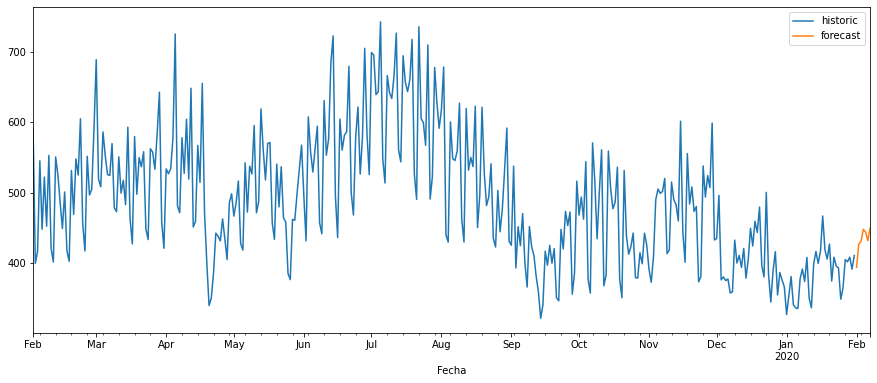

In [88]:
import matplotlib.pyplot as plt

fig, ax=plt.subplots(figsize=(15, 6))
df.plot(x = 'Fecha', y='consumo_medio',ax=ax, label='historic')
df.plot(x = 'Fecha', y='Consumo_medio_pred',ax=ax, label='forecast')
ax.legend();

### Para investigar mas...

Podéis acceder al repositorio de [microsof/powerbi-jupyter](https://github.com/microsoft/powerbi-jupyter)

## Trabajando los datos

En paralelo a esa visualización de datos, es posible que nos hayamos ya dado cuenta de que los datos requieren un pre-procesado para poder trabajar con ellos a mayor nivel. Esto puede suponer realizar agregaciones de datos, seleccionar un subset de los mismos, comprobar valores vacíos, etc...

Durante el proceso de exploración y visualizando los datos inicialmente determinamos que se tenían 2747 contadores de agua diferentes siendo la fecha mínima el 2019-02-01 y la fecha máxima el 2020-01-31. La gran mayoría de los contadores registraron medidas durante el periodo completo, en este caso más de 2000 IDs registraron los 365 días, por lo que se puede comprobar que la serie de datos está bastante completa, pero es destacable también algunos grupos de IDs que registrar incluso menos de 100 días de datos.

Con el objetivo de estudiar el comportamiento de la serie de la manera más sencilla, en primer lugar se decidió trabajar con un grupo de 100 IDs, reduciendo así el tamaño del conjunto. Puesto que el conjunto de datos no tiene muchas características, debemos centrarnos en los aspectos principales de una **serie temporal univariante**, tales como los ciclos, la tendencia y la estacionalidad.



In [13]:
import numpy as np
import matplotlib.pyplot as plt

En nuestro caso previamente ya hemos hecho una agregación diaria de los datos originales

In [14]:
water_consumptions = pd.read_csv('../src/data/water_consumption_complete.csv', sep=",")
water_consumptions.head(15)

,id,datetime,consumption
0,0,2019-02-01,243
1,0,2019-02-02,236
2,0,2019-02-03,335
3,0,2019-02-04,252
4,0,2019-02-05,220
5,0,2019-02-06,276
6,0,2019-02-07,277
7,0,2019-02-08,193
8,0,2019-02-09,262
9,0,2019-02-10,315


In [32]:
len(set(water_consumptions['id']))

2747

Como hemos comentado anteriormente, 2747 ids nos arroja una gran cantidad de datos, y en esta fase simplemente estamos explorando posibilidad y aprendiendo sobre el conjunto de datos. Por tanto, vamos a seleccionar un subset con los primeros 100 contadores

In [16]:
water_consumptions_100 = water_consumptions[water_consumptions['id'] < 100]
water_consumptions_100.head()

,id,datetime,consumption
0,0,2019-02-01,243
1,0,2019-02-02,236
2,0,2019-02-03,335
3,0,2019-02-04,252
4,0,2019-02-05,220


In [18]:
print(set(water_consumptions_100['id']))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99}


In [29]:
water_consumptions_100['datetime'] = water_consumptions_100['datetime'].astype('datetime64[ns]')
a = water_consumptions_100['datetime'].max()
b = water_consumptions_100['datetime'].min()
c = a-b

print(f"Max date is:  {a}  \nMin date is:  {b} \nNumber of days is:  {c}")

Max date is:  2020-01-31 00:00:00  
Min date is:  2019-02-01 00:00:00 
Number of days is:  364 days 00:00:00


/tmp/ipykernel_6347/3087468583.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  water_consumptions_100['datetime'] = water_consumptions_100['datetime'].astype('datetime64[ns]')


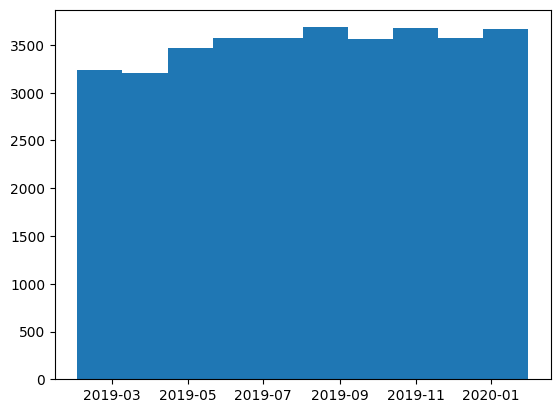

In [31]:

plt.hist(water_consumptions_100['datetime']);

Vemos que desde el inicio del _dataset_ hasta el final la cantidad de datos va aumentando, probablemente porque se incorporan nuevos contadores

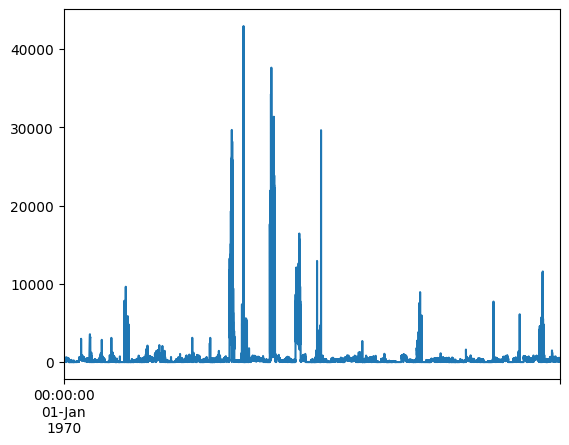

In [38]:
water_consumptions_100['consumption'].plot();

Este plot no es muy bonito, ni está demasiado arreglado, pero no es nuestro objetivo en este momento. Si que vemos que en algunos momentos a lo largo del conjunto, tenemos algunos picos, vamos a probar una nueva agregación, con todos los ids juntos, para ver los datos desde una perspectiva más global

In [34]:
water_consumption_per_day = water_consumptions_100.drop('id', axis=1).groupby('datetime').sum()
water_consumption_per_day.head()

,consumption
datetime,
2019-02-01,41711
2019-02-02,27709
2019-02-03,28063
2019-02-04,47003
2019-02-05,41736


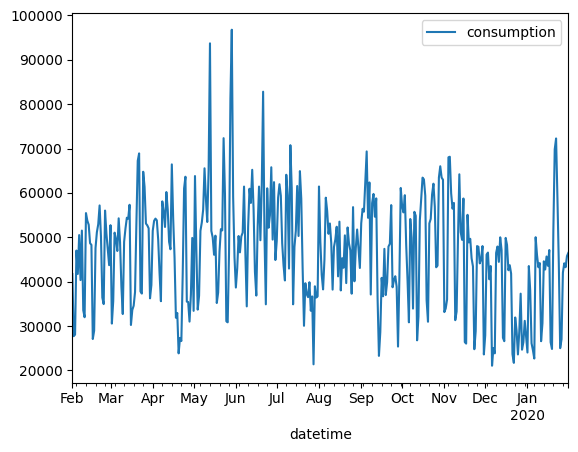

In [36]:
water_consumption_per_day.plot();

Esta gráfica ya se entiende un poco más, e incluso nos permite ya sacar nuestras primeras conclusiones. Los datos parece que siguen algún patrón estacional, ya que la línea forma una y otra vez los mismos picos repetidamente. Además parece que la tendencia el ligeramente a la baja.

Pero para poder estudiar este fenómeno más claramente, lo mejor es utilizar la descomposición de la serie temporal.

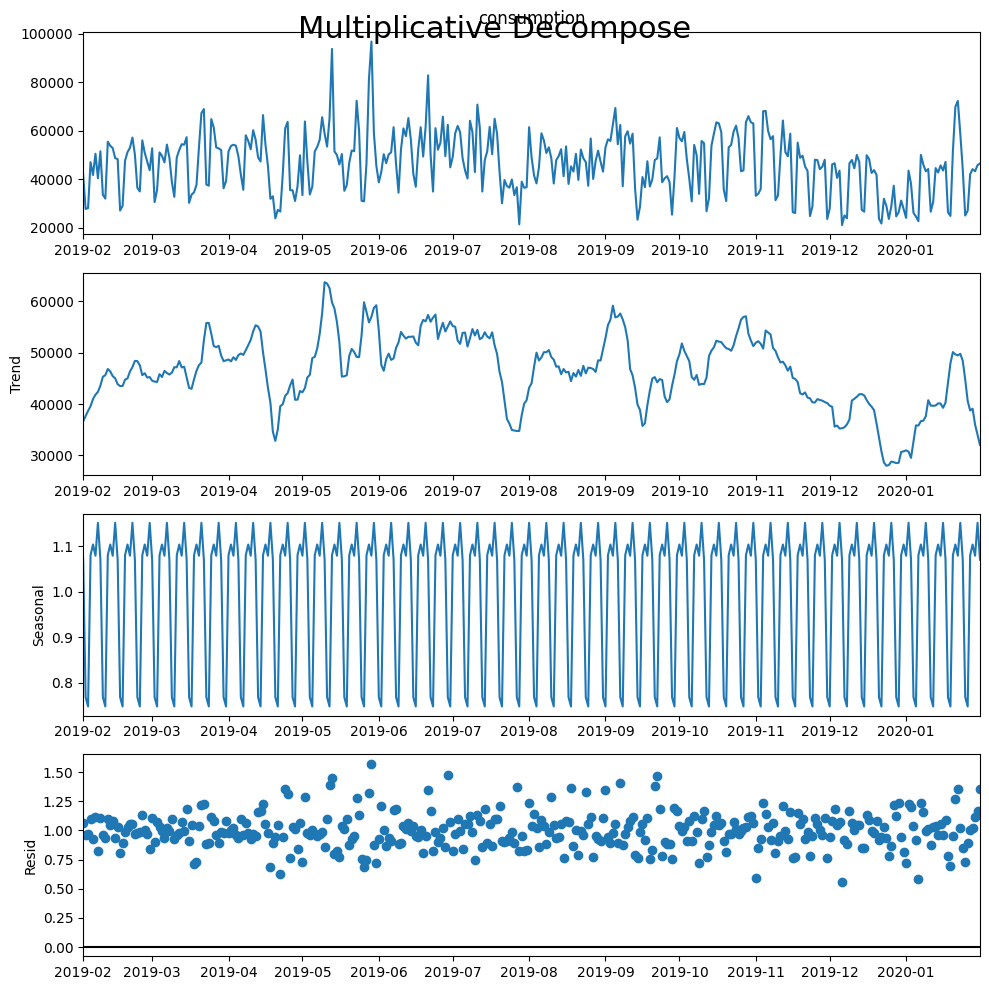

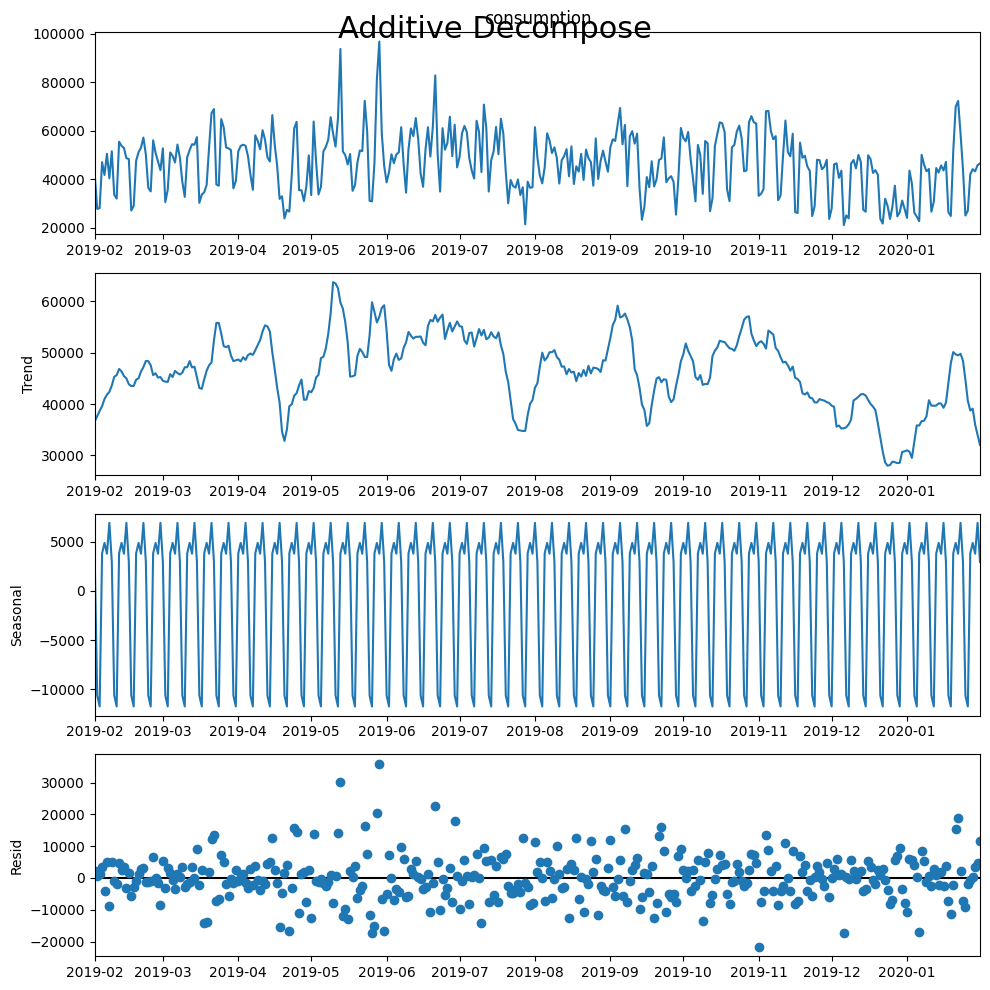

In [39]:
from statsmodels.tsa.seasonal import seasonal_decompose


water_consumption_per_day.index = pd.to_datetime(water_consumption_per_day.index)

result_mul = seasonal_decompose(water_consumption_per_day['consumption'], model='multiplicative', extrapolate_trend='freq')
result_add = seasonal_decompose(water_consumption_per_day['consumption'], model='additive', extrapolate_trend='freq')


# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

Las sospechas que tenemos se confirman, la serie es muy estacional y parece que todos los meses repite el mismo patrón de 4 picos y bajadas, es decir, tenemos una estacionalidad semanal muy clara.

Además se ve esa tendencia de la que hablabamos, aunque parece que al principio aumenta, y después empieza a bajar, aun así se aprecia en el gráfico de tendencia que es posible que incluso tengamos algun nivel de estacional superior, durante el año, ya que parece que cada trimestre sigue un patrón parecido.

Con esto ya hemos avanzado en una de las principales características a evaluar en una serie temporal, su **estacionalidad**, además de ver la **tendencia**.
Pero, ¿qué más hay?, podemos también evaluar si la serie está autocorrelacionada, es decir, si los valores registrados pueden explicarse en alguna medidad por los valores anteriores.

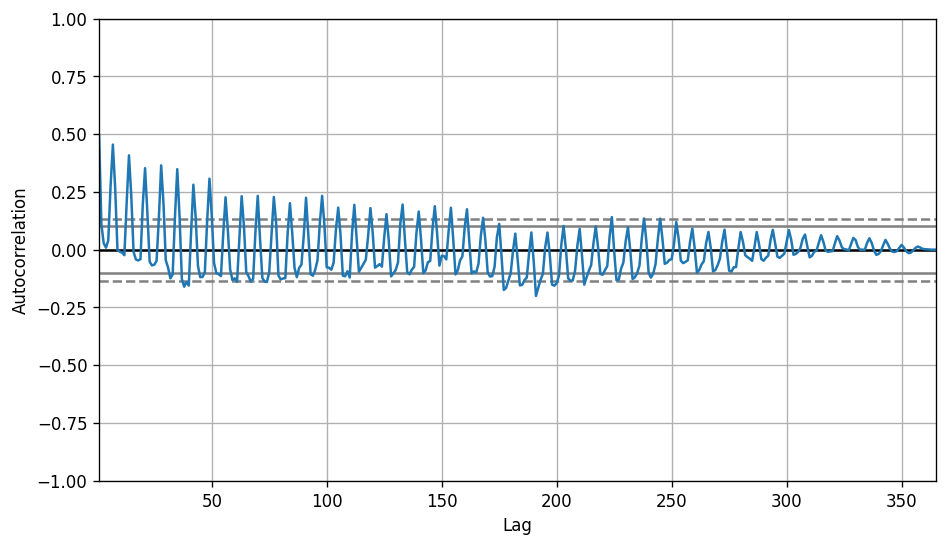

In [44]:
from pandas.plotting import autocorrelation_plot

# Draw Plot
plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':120})
autocorrelation_plot(water_consumption_per_day.consumption.tolist());

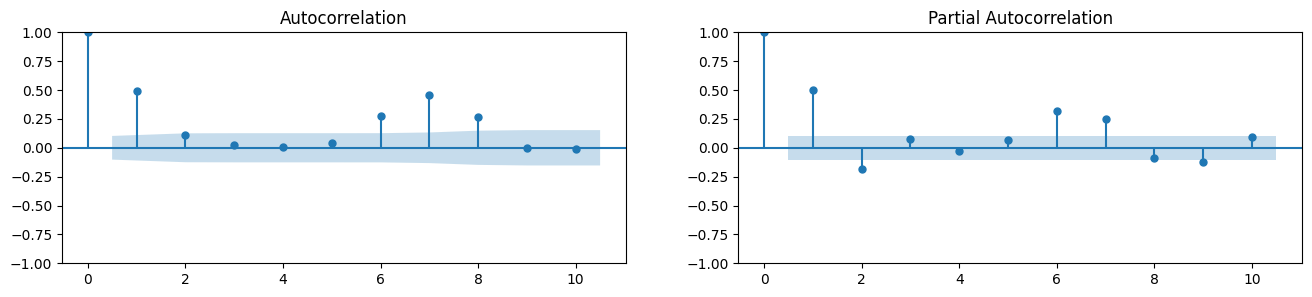

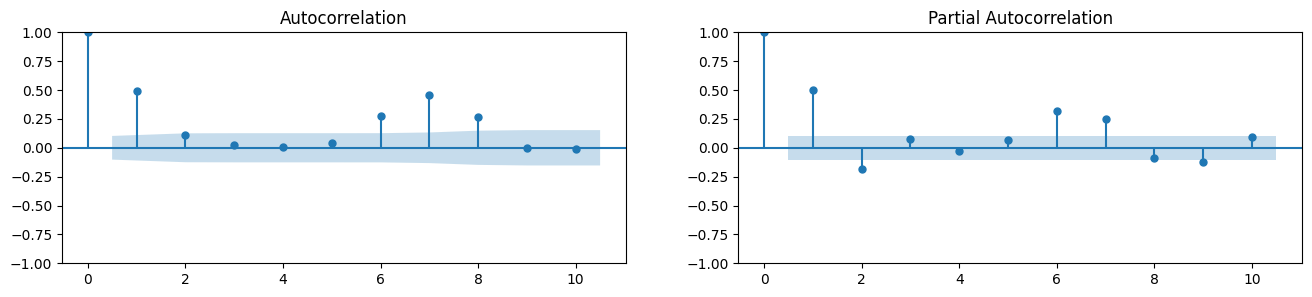

In [48]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(water_consumption_per_day.consumption.tolist(), lags=10, ax=axes[0])
plot_pacf(water_consumption_per_day.consumption.tolist(), lags=10, ax=axes[1])

Otra de las características importantes a la hora de tratar con datos de series temporales, es su **estacionariedad**, es decir, si el comportamiento de la serie es más o menos constantes a lo largo de todo el periodo. Esto quiere decir que la serie no ha sufrido un cambio brusco en su comportamiento en el histórico que le pasamos.

Para ello, la libreria statsmodels que estamos utilizando todo el rato nos provee de la clase [adfuller](https://www.statsmodels.org/0.6.1/generated/statsmodels.tsa.stattools.adfuller.html) que nos permite realizar un test de raíz unitaria o [unit root](https://en.wikipedia.org/wiki/Unit_root), lo que es básicamente una característica de un proceso estocástico. 
En este caso, si el proceso fuese estocástico, quiere decir que no existe estacionariedad ni autocorrelación.

In [49]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC')
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)
    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        print(out.to_string())
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [50]:
adf_test(water_consumption_per_day['consumption'], 'Daily water consumption')

Augmented Dickey-Fuller Test: Daily water consumption
ADF test statistic      -2.631943
p-value                  0.086573
# lags used             13.000000
# observations         351.000000
critical value (1%)     -3.449119
ADF test statistic      -2.631943
p-value                  0.086573
# lags used             13.000000
# observations         351.000000
critical value (1%)     -3.449119
critical value (5%)     -2.869810
ADF test statistic       -2.631943
p-value                   0.086573
# lags used              13.000000
# observations          351.000000
critical value (1%)      -3.449119
critical value (5%)      -2.869810
critical value (10%)     -2.571176
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


En este caso el test para los 100 primeros ids nos dice que la serie no es estacionaria!!
Esto es vital a la hora de decidir que tipos de modelos utilizar, nosotros ya teníamos la idea de utilizar un modelo clásico de series temporales como puede ser ARIMA y sus derivados, o más bien SARIMA, por la componente estacional, sin embargo, utilizar los modelos tipo ARMA requieren que la serie sea estacionaria.
De esto modo, si tenemos en cuenta, por ejemplo, los componentes de un modelo ARIMA (p,d,q) o SARIMA (P,D,Q), la d hace referencia a que el modelo es diferenciado o derivado.
Si aplicamos una primera derivada a nuestros datos:

In [52]:
adf_test(water_consumption_per_day['consumption'].diff(), 'Daily water consumption')

Augmented Dickey-Fuller Test: Daily water consumption
ADF test statistic    -9.641191e+00
p-value                1.519330e-16
# lags used            1.200000e+01
# observations         3.510000e+02
critical value (1%)   -3.449119e+00
ADF test statistic    -9.641191e+00
p-value                1.519330e-16
# lags used            1.200000e+01
# observations         3.510000e+02
critical value (1%)   -3.449119e+00
critical value (5%)   -2.869810e+00
ADF test statistic     -9.641191e+00
p-value                 1.519330e-16
# lags used             1.200000e+01
# observations          3.510000e+02
critical value (1%)    -3.449119e+00
critical value (5%)    -2.869810e+00
critical value (10%)   -2.571176e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


Y ya lo tenemos, con este test de Dickey-Fuller de hecho estamos ya adelantando que el componente ideal para estos datos de los 100 primeros ids es d=1

## División Train - Test

Tal y como hemos ido comprobando, por las características de los datos, estamos hablando de una serie temporal. Y esto quiere decir que, en cierta manera los datos son continuos, y que a la hora de predecir, estamos haciendo un forecasting de los siguentes n valores.

Por ello, se debe tener cuidado al seleccionar una división entre train-test, ya que estas deben presentar una continuidad.

In [54]:
from datetime import datetime

first_test_date = datetime(2020, 1, 1)
train_general = water_consumption_per_day[water_consumption_per_day.index < first_test_date]
test_general = water_consumption_per_day[water_consumption_per_day.index >= first_test_date]
print(len(train_general))
print(len(test_general))

334
31


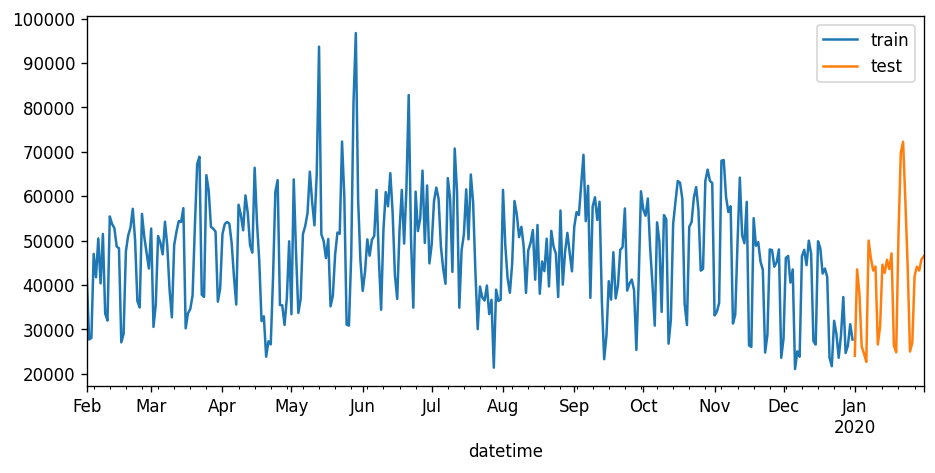

In [55]:
fig, ax=plt.subplots(figsize=(9, 4))
train_general['consumption'].plot(ax=ax, label='train')
test_general['consumption'].plot(ax=ax, label='test')
ax.legend();

## Conclusiones

En esta parte hemos marcado los aspectos fundamentales de la inicialización de un proyecto de datos, desde su planificación metodológica, configuración del entorno de trabajo, entendimiento del problema e inicio de la exploración de datos.

Lo aplicado aquí es posible que deba repetirse en múltiples ocasiones, por ejemplo, hemos trabajado con menos de un 5% de los datos reales, que pueden poner los pilares fundamentales para arrancar el problema, tras múltiples iteraciones, el conocimiento del proyecto y del problema va aumentando, y estamos sujetos a cambiar ligera o ampliamente todo aquello que habíamos desarrollado para resolver el problema.

También se ha repasado la improtancia de las visualizaciones. Las visualizaciones nos ayudan a comprender los datos, y eso no solo es positivo a la hora de afrontar el problema, también va a hacer que nuestros interlocutores lo entiendan. Un buen modelo con una buena métrica os puede llevar a la final, pero unas buenas visualizaciones y un exposición clara es lo que os llevará a ganar.



## Acceso al repositorio

[Repositorio de datos del seminario](https://github.com/arturperona/seminario_big_data)